## Import Packages

In [52]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['text.usetex'] = True
import pandas as pd
import matplotlib as mpl
import scipy.stats as stats
import os
import Area_Avg
import calcSIE
import ttest
#import seaborn as sns
#sns.set_context("talk")
import cyclic_lon
import Smooth_Data
from netCDF4 import Dataset
from netCDF4 import MFDataset
from ncdump_python3 import ncdump
from mpl_toolkits.basemap import Basemap
%matplotlib inline
mpl.rc('font',size=27) #set default font size and weight for plots

In [2]:
Months = ['01','02','03','04','05','06','07','08','09','10','11','12']
Sims = ['Sim1','Sim2','Sim3']
Seasons = ['DJF','MAM','JJA','SON']

In [3]:
#establish initial root directory and modify it to be a list of strings,
    #not integers

rootdir = 'Data/'

dirnames = os.listdir(rootdir)
dirnames = list(map(str, dirnames))
dirnames

['.DS_Store',
 'Port',
 'b.e10.BRCP45WCN.f19_g16.waLMP.001',
 'b.e10.BRCP45WCN.f19_g16.waLMP.002',
 'b.e10.BRCP45WCN.f19_g16.waLMP.003',
 'b40.1955-2005.2deg.wcm.002',
 'b40.rcp4_5.2deg.wcm.001',
 'b40.rcp4_5.2deg.wcm.002',
 'b40.rcp4_5.2deg.wcm.003',
 'b40.rcp4_5.2deg.wcm.fixODS2000.001',
 'b40.rcp4_5.2deg.wcm.fixODS2000.002',
 'b40.rcp4_5.2deg.wcm.fixODS2000.003']

In [4]:
#establish full directories for each run

#WACCM4 2Deg Warming RCP 45 Run1
datadir_RCP45_Sim1 = rootdir + dirnames[6]+ '/atm/'
#WACCM4 2Deg Warming RCP 45 Run2
datadir_RCP45_Sim2 = rootdir + dirnames[7]+ '/atm/'
#WACCM4 2Deg Warming RCP 45 Run3
datadir_RCP45_Sim3 = rootdir + dirnames[8]+ '/atm/'
#WACCM4 2Deg Warming fixODS RCP 45 Run1
datadir_fixODS_Sim1 = rootdir + dirnames[9]+ '/atm/'   
#WACCM4 2Deg Warming fixODS RCP 45 Run2
datadir_fixODS_Sim2 = rootdir + dirnames[10]+ '/atm/'
#WACCM4 2Deg Warming fixODS RCP 45 Run3
datadir_fixODS_Sim3 = rootdir + dirnames[11]+ '/atm/'
#WACCM4 2Deg Warming waLMP RCP 45 Run1
datadir_waAVD_Sim1 = rootdir + dirnames[2]+ '/atm/'
#WACCM4 2Deg Warming waLMP RCP 45 Run2
datadir_waAVD_Sim2 = rootdir + dirnames[3]+ '/atm/'
#WACCM4 2Deg Warming waLMP RCP 45 Run3
datadir_waAVD_Sim3 = rootdir + dirnames[4]+ '/atm/'

Datadir_RCP45 = [datadir_RCP45_Sim1,\
               datadir_RCP45_Sim2,\
               datadir_RCP45_Sim3]
Datadir_fixODS2000 = [datadir_fixODS_Sim1,\
               datadir_fixODS_Sim2,\
               datadir_fixODS_Sim3]
Datadir_wAVD = [datadir_waAVD_Sim1,\
               datadir_waAVD_Sim2,\
               datadir_waAVD_Sim3]

In [5]:
Years = range(2005,2066)
Years = list(map(str, Years))

Years_fixODS = range(2001,2066)
Years_fixODS = list(map(str, Years_fixODS))

In [6]:
Datadir_wAVD[0]

'Data/b.e10.BRCP45WCN.f19_g16.waLMP.001/atm/'

In [7]:
Sample_file = Datadir_wAVD[0] + '/ICEFRAC.01.allyrs.nc'
Sample_file = Dataset(Sample_file)
#ncdump(Sample_file)
Lat = np.squeeze(Sample_file.variables['lat'])
Lon = np.squeeze(Sample_file.variables['lon'])
ncdump(Sample_file)
Sample_file.close()

NetCDF Global Attributes:
	Conventions: 'CF-1.0'
	source: 'CAM'
	case: 'b.e10.BRCP45WCN.f19_g16.waLMP.001'
	title: 'UNSET'
	logname: 'polvani'
	host: 'ys1241'
	Version: '$Name$'
	revision_Id: '$Id$'
	initial_file: '/glade/scratch/polvani/archive/b.e10.BRCP45WCN.f19_g16.waLMPprep.001/rest/2005-01-11-00000/b.e10.BRCP45WCN.f19_g16.waLMPprep.001.cam2.i.2005-01-11-00000.nc'
	topography_file: '/glade/p/cesm/cseg/inputdata/atm/cam/topo/USGS-gtopo30_1.9x2.5_remap_c050602.nc'
	history: 'Mon Mar 26 08:24:49 2018: ncecat -O /glade2/scratch2/ksmith/b.e10.BRCP45WCN.f19_g16.waLMP.001/atm/ICEFRAC.2005.01.nc /glade2/scratch2/ksmith/b.e10.BRCP45WCN.f19_g16.waLMP.001/atm/ICEFRAC.2006.01.nc /glade2/scratch2/ksmith/b.e10.BRCP45WCN.f19_g16.waLMP.001/atm/ICEFRAC.2007.01.nc /glade2/scratch2/ksmith/b.e10.BRCP45WCN.f19_g16.waLMP.001/atm/ICEFRAC.2008.01.nc /glade2/scratch2/ksmith/b.e10.BRCP45WCN.f19_g16.waLMP.001/atm/ICEFRAC.2009.01.nc /glade2/scratch2/ksmith/b.e10.BRCP45WCN.f19_g16.waLMP.001/atm/ICEFRAC.2010.0

In [8]:
calcSIE.gridArea(Lat,Lon)

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.68379395e+08, 9.68379395e+08, 9.68379395e+08, ...,
        9.68379395e+08, 9.68379395e+08, 9.68379395e+08],
       [2.90407928e+09, 2.90407928e+09, 2.90407928e+09, ...,
        2.90407928e+09, 2.90407928e+09, 2.90407928e+09],
       ...,
       [4.83660359e+09, 4.83660359e+09, 4.83660359e+09, ...,
        4.83660359e+09, 4.83660359e+09, 4.83660359e+09],
       [2.90407928e+09, 2.90407928e+09, 2.90407928e+09, ...,
        2.90407928e+09, 2.90407928e+09, 2.90407928e+09],
       [9.68379395e+08, 9.68379395e+08, 9.68379395e+08, ...,
        9.68379395e+08, 9.68379395e+08, 9.68379395e+08]])

In [9]:
#Read in all WACCM Data

RCP45 = dict()
for s in range(len(Sims)):
    RCP45[Sims[s]] = dict()
    for m in range(len(Months)):
        files_RCP45 = Datadir_RCP45[s]+'ICEFRAC.'+Months[m]+'.allyrs.nc'
        RCP45_nc = Dataset(files_RCP45)
        RCP45[Sims[s]][Months[m]] = \
        np.squeeze(RCP45_nc.variables['ICEFRAC'])
        RCP45_nc.close()

fixODS2000 = dict()
for s in range(len(Sims)):
    fixODS2000[Sims[s]] = dict()
    for m in range(len(Months)):
        files_fixODS2000 = Datadir_fixODS2000[s]+'ICEFRAC.'+Months[m]+'.allyrs.nc'
        fixODS2000_nc = Dataset(files_fixODS2000)
        fixODS2000[Sims[s]][Months[m]] = \
        np.squeeze(fixODS2000_nc.variables['ICEFRAC'])
        fixODS2000_nc.close()
        
wAVD = dict()
for s in range(len(Sims)):
    wAVD[Sims[s]] = dict()
    for m in range(len(Months)):
        files_wAVD = Datadir_wAVD[s]+'ICEFRAC.'+Months[m]+'.allyrs.nc'
        wAVD_nc = Dataset(files_wAVD)
        wAVD[Sims[s]][Months[m]] = \
        np.squeeze(wAVD_nc.variables['ICEFRAC'])
        wAVD_nc.close()

## START WITH RCP45

In [10]:
RCP45.keys()

dict_keys(['Sim1', 'Sim2', 'Sim3'])

In [11]:
RCP45['Sim1']['01'].shape

(61, 96, 144)

In [12]:
#Modify longitude for polar centre basemap projections 

lon1 = Lon[1:73]
lon2 = Lon[72:144] - 360
Lon_new = np.hstack((lon2,lon1))

In [13]:
RCP45_DF = pd.DataFrame.from_dict(RCP45, orient = 'columns')
fixODS2000_DF = pd.DataFrame.from_dict(fixODS2000, orient = 'columns')
wAVD_DF = pd.DataFrame.from_dict(wAVD, orient = 'columns')

Note, when indexing from a Dataframe versus a panel, the order is reversed in terms of what gets indexed first, like so:

For some Panel: Example_Panel.loc[Item:Major:Minor]       Typically, the item coincides with the columns depending on how you orient it when it's generated 

For some Dataframe: Example_Panel.loc[Row:Column] If both were hypothetically oriented by items (Panel) and Columns (dataframe) then the indexing ordering is reversed

In [14]:
RCP45_DF.head()

,Sim1,Sim2,Sim3
01,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
02,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
03,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
04,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
05,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."


In [15]:
#Have to do december different for DJF Remember
#DJF
RCP45_1DA_D_Avg = RCP45_DF.loc['12','Sim1':'Sim3']
RCP45_1DA_D_Avg = np.asarray(RCP45_1DA_D_Avg)
RCP45_1DA_D_Avg = np.stack(RCP45_1DA_D_Avg[:], axis=0)
RCP45_1DA_D_Avg = RCP45_1DA_D_Avg[:,0:10,:,:]

RCP45_2DA_D_Avg = RCP45_DF.loc['12','Sim1':'Sim3']
RCP45_2DA_D_Avg = np.asarray(RCP45_2DA_D_Avg)
RCP45_2DA_D_Avg = np.stack(RCP45_2DA_D_Avg[:], axis=0)
RCP45_2DA_D_Avg = RCP45_2DA_D_Avg[:,49:59,:,:]

RCP45_1DA_JF_Avg = RCP45_DF.loc['01':'02','Sim1':'Sim3']
RCP45_1DA_JF_Avg = np.asarray(RCP45_1DA_JF_Avg)
RCP45_1DA_JF_Avg = np.mean(RCP45_1DA_JF_Avg, axis=(0))
RCP45_1DA_JF_Avg = np.stack(RCP45_1DA_JF_Avg[:], axis=0)
RCP45_1DA_JF_Avg = RCP45_1DA_JF_Avg[:,1:11,:,:]

RCP45_2DA_JF_Avg = RCP45_DF.loc['01':'02','Sim1':'Sim3']
RCP45_2DA_JF_Avg = np.asarray(RCP45_2DA_JF_Avg)
RCP45_2DA_JF_Avg = np.mean(RCP45_2DA_JF_Avg, axis=(0))
RCP45_2DA_JF_Avg = np.stack(RCP45_2DA_JF_Avg[:], axis=0)
RCP45_2DA_JF_Avg = RCP45_2DA_JF_Avg[:,50:60,:,:]

RCP45_1DA_DJF_Avg = np.mean((RCP45_1DA_JF_Avg,RCP45_1DA_D_Avg), axis=0)
RCP45_2DA_DJF_Avg = np.mean((RCP45_2DA_JF_Avg,RCP45_2DA_D_Avg), axis=0)

RCP45_1DA_DJF_Avg = np.mean(RCP45_1DA_DJF_Avg, axis=(0,1))
RCP45_2DA_DJF_Avg = np.mean(RCP45_2DA_DJF_Avg, axis=(0,1))

RCP45_2DA_DJF_Avg.shape

(96, 144)

In [16]:
#MAM

RCP45_1DA_MAM_Avg = RCP45_DF.loc['03':'05','Sim1':'Sim3']
RCP45_1DA_MAM_Avg = np.asarray(RCP45_1DA_MAM_Avg)
RCP45_1DA_MAM_Avg = np.mean(RCP45_1DA_MAM_Avg, axis=(0,1))
RCP45_1DA_MAM_Avg = RCP45_1DA_MAM_Avg[1:11,:,:]
RCP45_1DA_MAM_Avg = np.mean(RCP45_1DA_MAM_Avg,axis=0)

RCP45_2DA_MAM_Avg = RCP45_DF.loc['03':'05','Sim1':'Sim3']
RCP45_2DA_MAM_Avg = np.asarray(RCP45_2DA_MAM_Avg)
RCP45_2DA_MAM_Avg = np.mean(RCP45_2DA_MAM_Avg, axis=(0,1))
RCP45_2DA_MAM_Avg = RCP45_2DA_MAM_Avg[50:60,:,:]
RCP45_2DA_MAM_Avg = np.mean(RCP45_2DA_MAM_Avg,axis=0)
RCP45_2DA_MAM_Avg.shape

(96, 144)

In [17]:
#JJA

RCP45_1DA_JJA_Avg = RCP45_DF.loc['06':'08','Sim1':'Sim3']
RCP45_1DA_JJA_Avg = np.asarray(RCP45_1DA_JJA_Avg)
RCP45_1DA_JJA_Avg = np.mean(RCP45_1DA_JJA_Avg, axis=(0,1))
RCP45_1DA_JJA_Avg = RCP45_1DA_JJA_Avg[1:11,:,:]
RCP45_1DA_JJA_Avg = np.mean(RCP45_1DA_JJA_Avg,axis=0)

RCP45_2DA_JJA_Avg = RCP45_DF.loc['06':'08','Sim1':'Sim3']
RCP45_2DA_JJA_Avg = np.asarray(RCP45_2DA_JJA_Avg)
RCP45_2DA_JJA_Avg = np.mean(RCP45_2DA_JJA_Avg, axis=(0,1))
RCP45_2DA_JJA_Avg = RCP45_2DA_JJA_Avg[50:60,:,:]
RCP45_2DA_JJA_Avg = np.mean(RCP45_2DA_JJA_Avg,axis=0)
RCP45_2DA_JJA_Avg.shape

(96, 144)

In [18]:
#SON

RCP45_1DA_SON_Avg = RCP45_DF.loc['09':'11','Sim1':'Sim3']
RCP45_1DA_SON_Avg = np.asarray(RCP45_1DA_SON_Avg)
RCP45_1DA_SON_Avg = np.mean(RCP45_1DA_SON_Avg, axis=(0,1))
RCP45_1DA_SON_Avg = RCP45_1DA_SON_Avg[1:11,:,:]
RCP45_1DA_SON_Avg = np.mean(RCP45_1DA_SON_Avg,axis=0)

RCP45_2DA_SON_Avg = RCP45_DF.loc['09':'11','Sim1':'Sim3']
RCP45_2DA_SON_Avg = np.asarray(RCP45_2DA_SON_Avg)
RCP45_2DA_SON_Avg = np.mean(RCP45_2DA_SON_Avg, axis=(0,1))
RCP45_2DA_SON_Avg = RCP45_2DA_SON_Avg[50:60,:,:]
RCP45_2DA_SON_Avg = np.mean(RCP45_2DA_SON_Avg,axis=0)
RCP45_1DA_SON_Avg.shape

(96, 144)

In [19]:
RCP45_1DA_DJF_Avg_lon1 = RCP45_1DA_DJF_Avg[:,1:73]
RCP45_1DA_DJF_Avg_lon2 = RCP45_1DA_DJF_Avg[:,72:144]
RCP45_1DA_DJF_Avg_new = np.concatenate([RCP45_1DA_DJF_Avg_lon2,\
                                   RCP45_1DA_DJF_Avg_lon1],axis=1)

RCP45_2DA_DJF_Avg_lon1 = RCP45_2DA_DJF_Avg[:,1:73]
RCP45_2DA_DJF_Avg_lon2 = RCP45_2DA_DJF_Avg[:,72:144]
RCP45_2DA_DJF_Avg_new = np.concatenate([RCP45_2DA_DJF_Avg_lon2,\
                                   RCP45_2DA_DJF_Avg_lon1],axis=1)

In [20]:
RCP45_1DA_MAM_Avg_lon1 = RCP45_1DA_MAM_Avg[:,1:73]
RCP45_1DA_MAM_Avg_lon2 = RCP45_1DA_MAM_Avg[:,72:144]
RCP45_1DA_MAM_Avg_new = np.concatenate([RCP45_1DA_MAM_Avg_lon2,\
                                   RCP45_1DA_MAM_Avg_lon1],axis=1)

RCP45_2DA_MAM_Avg_lon1 = RCP45_2DA_MAM_Avg[:,1:73]
RCP45_2DA_MAM_Avg_lon2 = RCP45_2DA_MAM_Avg[:,72:144]
RCP45_2DA_MAM_Avg_new = np.concatenate([RCP45_2DA_MAM_Avg_lon2,\
                                   RCP45_2DA_MAM_Avg_lon1],axis=1)

In [21]:
RCP45_1DA_JJA_Avg_lon1 = RCP45_1DA_JJA_Avg[:,1:73]
RCP45_1DA_JJA_Avg_lon2 = RCP45_1DA_JJA_Avg[:,72:144]
RCP45_1DA_JJA_Avg_new = np.concatenate([RCP45_1DA_JJA_Avg_lon2,\
                                   RCP45_1DA_JJA_Avg_lon1],axis=1)

RCP45_2DA_JJA_Avg_lon1 = RCP45_2DA_JJA_Avg[:,1:73]
RCP45_2DA_JJA_Avg_lon2 = RCP45_2DA_JJA_Avg[:,72:144]
RCP45_2DA_JJA_Avg_new = np.concatenate([RCP45_2DA_JJA_Avg_lon2,\
                                   RCP45_2DA_JJA_Avg_lon1],axis=1)

In [22]:
RCP45_1DA_SON_Avg_lon1 = RCP45_1DA_SON_Avg[:,1:73]
RCP45_1DA_SON_Avg_lon2 = RCP45_1DA_SON_Avg[:,72:144]
RCP45_1DA_SON_Avg_new = np.concatenate([RCP45_1DA_SON_Avg_lon2,\
                                   RCP45_1DA_SON_Avg_lon1],axis=1)

RCP45_2DA_SON_Avg_lon1 = RCP45_2DA_SON_Avg[:,1:73]
RCP45_2DA_SON_Avg_lon2 = RCP45_2DA_SON_Avg[:,72:144]
RCP45_2DA_SON_Avg_new = np.concatenate([RCP45_2DA_SON_Avg_lon2,\
                                   RCP45_2DA_SON_Avg_lon1],axis=1)

In [23]:
RCP45_DD_DJF_Avg_new = RCP45_2DA_DJF_Avg_new-RCP45_1DA_DJF_Avg_new
RCP45_DD_MAM_Avg_new = RCP45_2DA_MAM_Avg_new-RCP45_1DA_MAM_Avg_new
RCP45_DD_JJA_Avg_new = RCP45_2DA_JJA_Avg_new-RCP45_1DA_JJA_Avg_new
RCP45_DD_SON_Avg_new = RCP45_2DA_SON_Avg_new-RCP45_1DA_SON_Avg_new

Calc P Values for Seasonal Decadal Difference

In [24]:
#Have to do december different for DJF Remember
#DJF
RCP45_1DA_TmSrs_D = RCP45_DF.loc['12','Sim1':'Sim3']
RCP45_1DA_TmSrs_D = np.asarray(RCP45_1DA_TmSrs_D)
RCP45_1DA_TmSrs_D = np.stack(RCP45_1DA_TmSrs_D[:], axis=0)
RCP45_1DA_TmSrs_D = RCP45_1DA_TmSrs_D[:,0:10,:,:]

RCP45_2DA_TmSrs_D = RCP45_DF.loc['12','Sim1':'Sim3']
RCP45_2DA_TmSrs_D = np.asarray(RCP45_2DA_TmSrs_D)
RCP45_2DA_TmSrs_D = np.stack(RCP45_2DA_TmSrs_D[:], axis=0)
RCP45_2DA_TmSrs_D = RCP45_2DA_TmSrs_D[:,49:59,:,:]

RCP45_1DA_TmSrs_JF = RCP45_DF.loc['01':'02','Sim1':'Sim3']
RCP45_1DA_TmSrs_JF = np.asarray(RCP45_1DA_TmSrs_JF)
RCP45_1DA_TmSrs_JF = np.mean(RCP45_1DA_TmSrs_JF, axis=(0))
RCP45_1DA_TmSrs_JF = np.stack(RCP45_1DA_TmSrs_JF[:], axis=0)
RCP45_1DA_TmSrs_JF = RCP45_1DA_TmSrs_JF[:,1:11,:,:]

RCP45_2DA_TmSrs_JF = RCP45_DF.loc['01':'02','Sim1':'Sim3']
RCP45_2DA_TmSrs_JF = np.asarray(RCP45_2DA_TmSrs_JF)
RCP45_2DA_TmSrs_JF = np.mean(RCP45_2DA_TmSrs_JF, axis=(0))
RCP45_2DA_TmSrs_JF = np.stack(RCP45_2DA_TmSrs_JF[:], axis=0)
RCP45_2DA_TmSrs_JF = RCP45_2DA_TmSrs_JF[:,50:60,:,:]

RCP45_1DA_TmSrs_DJF = np.mean((RCP45_1DA_TmSrs_JF,RCP45_1DA_TmSrs_D), axis=0)
RCP45_2DA_TmSrs_DJF = np.mean((RCP45_2DA_TmSrs_JF,RCP45_2DA_TmSrs_D), axis=0)

RCP45_1DA_TmSrs_DJF = np.mean(RCP45_1DA_TmSrs_DJF, axis=(1))
RCP45_2DA_TmSrs_DJF = np.mean(RCP45_2DA_TmSrs_DJF, axis=(1))

RCP45_2DA_TmSrs_DJF.shape

(3, 96, 144)

In [25]:
RCP45_1DA_TmSrs_DJF_lon1 = RCP45_1DA_TmSrs_DJF[:,:,1:73]
RCP45_1DA_TmSrs_DJF_lon2 = RCP45_1DA_TmSrs_DJF[:,:,72:144]
RCP45_1DA_TmSrs_DJF_new = np.concatenate([RCP45_1DA_TmSrs_DJF_lon2,\
                                   RCP45_1DA_TmSrs_DJF_lon1],axis=2)

RCP45_2DA_TmSrs_DJF_lon1 = RCP45_2DA_TmSrs_DJF[:,:,1:73]
RCP45_2DA_TmSrs_DJF_lon2 = RCP45_2DA_TmSrs_DJF[:,:,72:144]
RCP45_2DA_TmSrs_DJF_new = np.concatenate([RCP45_2DA_TmSrs_DJF_lon2,\
                                   RCP45_2DA_TmSrs_DJF_lon1],axis=2)
RCP45_2DA_TmSrs_DJF_new.shape

RCP45_DJF_Pval = ttest.ttest_2sample(RCP45_2DA_TmSrs_DJF_new,RCP45_1DA_TmSrs_DJF_new,0)
RCP45_DJF_Pval.shape

/Users/johnvirgin/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/johnvirgin/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/johnvirgin/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Users/johnvirgin/anaconda3/lib/python3.6/ttest.py:65: RuntimeWarning: invalid value encountered in greater_equal
  pval = np.ma.masked_where(pval>=0.05,pval)


(96, 144)

In [26]:
#MAM
RCP45_1DA_TmSrs_MAM = RCP45_DF.loc['03':'05','Sim1':'Sim3']
RCP45_1DA_TmSrs_MAM = np.asarray(RCP45_1DA_TmSrs_MAM)
RCP45_1DA_TmSrs_MAM = np.mean(RCP45_1DA_TmSrs_MAM, axis=0)
RCP45_1DA_TmSrs_MAM = np.stack((RCP45_1DA_TmSrs_MAM[:]))
RCP45_1DA_TmSrs_MAM = RCP45_1DA_TmSrs_MAM[:,1:11,:,:]
RCP45_1DA_TmSrs_MAM = np.mean(RCP45_1DA_TmSrs_MAM,axis=1)

       
RCP45_2DA_TmSrs_MAM = RCP45_DF.loc['03':'05','Sim1':'Sim3']
RCP45_2DA_TmSrs_MAM = np.asarray(RCP45_2DA_TmSrs_MAM)
RCP45_2DA_TmSrs_MAM = np.mean(RCP45_2DA_TmSrs_MAM, axis=0)
RCP45_2DA_TmSrs_MAM = np.stack((RCP45_2DA_TmSrs_MAM[:]))
RCP45_2DA_TmSrs_MAM = RCP45_2DA_TmSrs_MAM[:,50:60,:,:]
RCP45_2DA_TmSrs_MAM = np.mean(RCP45_2DA_TmSrs_MAM,axis=1)

RCP45_2DA_TmSrs_MAM.shape

(3, 96, 144)

In [27]:
RCP45_1DA_TmSrs_MAM_lon1 = RCP45_1DA_TmSrs_MAM[:,:,1:73]
RCP45_1DA_TmSrs_MAM_lon2 = RCP45_1DA_TmSrs_MAM[:,:,72:144]
RCP45_1DA_TmSrs_MAM_new = np.concatenate([RCP45_1DA_TmSrs_MAM_lon2,\
                                   RCP45_1DA_TmSrs_MAM_lon1],axis=2)

RCP45_2DA_TmSrs_MAM_lon1 = RCP45_2DA_TmSrs_MAM[:,:,1:73]
RCP45_2DA_TmSrs_MAM_lon2 = RCP45_2DA_TmSrs_MAM[:,:,72:144]
RCP45_2DA_TmSrs_MAM_new = np.concatenate([RCP45_2DA_TmSrs_MAM_lon2,\
                                   RCP45_2DA_TmSrs_MAM_lon1],axis=2)
RCP45_2DA_TmSrs_MAM_new.shape

RCP45_MAM_Pval = ttest.ttest_2sample(RCP45_2DA_TmSrs_MAM_new,RCP45_1DA_TmSrs_MAM_new,0)
RCP45_MAM_Pval.shape

/Users/johnvirgin/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/johnvirgin/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/johnvirgin/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Users/johnvirgin/anaconda3/lib/python3.6/ttest.py:65: RuntimeWarning: invalid value encountered in greater_equal
  pval = np.ma.masked_where(pval>=0.05,pval)


(96, 144)

In [28]:
#JJA
RCP45_1DA_TmSrs_JJA = RCP45_DF.loc['06':'08','Sim1':'Sim3']
RCP45_1DA_TmSrs_JJA = np.asarray(RCP45_1DA_TmSrs_JJA)
RCP45_1DA_TmSrs_JJA = np.mean(RCP45_1DA_TmSrs_JJA, axis=0)
RCP45_1DA_TmSrs_JJA = np.stack((RCP45_1DA_TmSrs_JJA[:]))
RCP45_1DA_TmSrs_JJA = RCP45_1DA_TmSrs_JJA[:,1:11,:,:]
RCP45_1DA_TmSrs_JJA = np.mean(RCP45_1DA_TmSrs_JJA,axis=1)

       
RCP45_2DA_TmSrs_JJA = RCP45_DF.loc['06':'08','Sim1':'Sim3']
RCP45_2DA_TmSrs_JJA = np.asarray(RCP45_2DA_TmSrs_JJA)
RCP45_2DA_TmSrs_JJA = np.mean(RCP45_2DA_TmSrs_JJA, axis=0)
RCP45_2DA_TmSrs_JJA = np.stack((RCP45_2DA_TmSrs_JJA[:]))
RCP45_2DA_TmSrs_JJA = RCP45_2DA_TmSrs_JJA[:,50:60,:,:]
RCP45_2DA_TmSrs_JJA = np.mean(RCP45_2DA_TmSrs_JJA,axis=1)

RCP45_2DA_TmSrs_JJA.shape

(3, 96, 144)

In [29]:
RCP45_1DA_TmSrs_JJA_lon1 = RCP45_1DA_TmSrs_JJA[:,:,1:73]
RCP45_1DA_TmSrs_JJA_lon2 = RCP45_1DA_TmSrs_JJA[:,:,72:144]
RCP45_1DA_TmSrs_JJA_new = np.concatenate([RCP45_1DA_TmSrs_JJA_lon2,\
                                   RCP45_1DA_TmSrs_JJA_lon1],axis=2)

RCP45_2DA_TmSrs_JJA_lon1 = RCP45_2DA_TmSrs_JJA[:,:,1:73]
RCP45_2DA_TmSrs_JJA_lon2 = RCP45_2DA_TmSrs_JJA[:,:,72:144]
RCP45_2DA_TmSrs_JJA_new = np.concatenate([RCP45_2DA_TmSrs_JJA_lon2,\
                                   RCP45_2DA_TmSrs_JJA_lon1],axis=2)
RCP45_2DA_TmSrs_JJA_new.shape

RCP45_JJA_Pval = ttest.ttest_2sample(RCP45_2DA_TmSrs_JJA_new,RCP45_1DA_TmSrs_JJA_new,0)
RCP45_JJA_Pval.shape

/Users/johnvirgin/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/johnvirgin/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/johnvirgin/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Users/johnvirgin/anaconda3/lib/python3.6/ttest.py:65: RuntimeWarning: invalid value encountered in greater_equal
  pval = np.ma.masked_where(pval>=0.05,pval)


(96, 144)

In [30]:
#SON
RCP45_1DA_TmSrs_SON = RCP45_DF.loc['09':'11','Sim1':'Sim3']
RCP45_1DA_TmSrs_SON = np.asarray(RCP45_1DA_TmSrs_SON)
RCP45_1DA_TmSrs_SON = np.mean(RCP45_1DA_TmSrs_SON, axis=0)
RCP45_1DA_TmSrs_SON = np.stack((RCP45_1DA_TmSrs_SON[:]))
RCP45_1DA_TmSrs_SON = RCP45_1DA_TmSrs_SON[:,1:11,:,:]
RCP45_1DA_TmSrs_SON = np.mean(RCP45_1DA_TmSrs_SON,axis=1)

       
RCP45_2DA_TmSrs_SON = RCP45_DF.loc['09':'11','Sim1':'Sim3']
RCP45_2DA_TmSrs_SON = np.asarray(RCP45_2DA_TmSrs_SON)
RCP45_2DA_TmSrs_SON = np.mean(RCP45_2DA_TmSrs_SON, axis=0)
RCP45_2DA_TmSrs_SON = np.stack((RCP45_2DA_TmSrs_SON[:]))
RCP45_2DA_TmSrs_SON = RCP45_2DA_TmSrs_SON[:,50:60,:,:]
RCP45_2DA_TmSrs_SON = np.mean(RCP45_2DA_TmSrs_SON,axis=1)

RCP45_2DA_TmSrs_SON.shape

(3, 96, 144)

In [31]:
RCP45_1DA_TmSrs_SON_lon1 = RCP45_1DA_TmSrs_SON[:,:,1:73]
RCP45_1DA_TmSrs_SON_lon2 = RCP45_1DA_TmSrs_SON[:,:,72:144]
RCP45_1DA_TmSrs_SON_new = np.concatenate([RCP45_1DA_TmSrs_SON_lon2,\
                                   RCP45_1DA_TmSrs_SON_lon1],axis=2)

RCP45_2DA_TmSrs_SON_lon1 = RCP45_2DA_TmSrs_SON[:,:,1:73]
RCP45_2DA_TmSrs_SON_lon2 = RCP45_2DA_TmSrs_SON[:,:,72:144]
RCP45_2DA_TmSrs_SON_new = np.concatenate([RCP45_2DA_TmSrs_SON_lon2,\
                                   RCP45_2DA_TmSrs_SON_lon1],axis=2)
RCP45_2DA_TmSrs_SON_new.shape

RCP45_SON_Pval = ttest.ttest_2sample(RCP45_2DA_TmSrs_SON_new,RCP45_1DA_TmSrs_SON_new,0)
RCP45_SON_Pval.shape

/Users/johnvirgin/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/johnvirgin/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/johnvirgin/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Users/johnvirgin/anaconda3/lib/python3.6/ttest.py:65: RuntimeWarning: invalid value encountered in greater_equal
  pval = np.ma.masked_where(pval>=0.05,pval)


(96, 144)

In [32]:
#define projection
xx, yy = np.meshgrid(Lon_new, Lat)
mm = Basemap(projection='ortho', lon_0 = -90 , lat_0=90,resolution='c')
x, y = mm(xx,yy) #converts rectangular meshgrid into meshgrid for the specific projection

## Difference in Fractional Coverage for RCP45

In [33]:
#fig = plt.figure(figsize=(10,25))

#plt.subplot(4,1,1)
#mm.drawcoastlines()
#mm.drawmapboundary(fill_color='none')
#mm.fillcontinents(color = 'grey')
#pc1 = mm.pcolormesh(x,y, RCP45_DD_DJF_Avg_new, cmap='winter')
#plt.clim(-1,1)
#pc2 = mm.contourf(x,y,RCP45_DJF_Pval , colors = 'none', hatches=['//'])
#plt.title("RCP45 (DJF)")
#parallels = [60]
#mm.drawparallels(parallels)

#plt.subplot(4,1,2)
#mm.drawcoastlines()
#mm.drawmapboundary(fill_color='none')
#mm.fillcontinents(color = 'grey')
#pc1 = mm.pcolormesh(x,y, RCP45_DD_MAM_Avg_new, cmap='winter')
#plt.clim(-1,1)
#pc2 = mm.contourf(x,y,RCP45_MAM_Pval , colors = 'none', hatches=['//'])
#plt.title("RCP45 (MAM)")
#parallels = [60]
#mm.drawparallels(parallels)

#plt.subplot(4,1,3)
#mm.drawcoastlines()
#mm.drawmapboundary(fill_color='none')
#mm.fillcontinents(color = 'grey')
#pc1 = mm.pcolormesh(x,y, RCP45_DD_JJA_Avg_new, cmap='winter')
#plt.clim(-1,1)
#pc2 = mm.contourf(x,y,RCP45_JJA_Pval , colors = 'none', hatches=['//'])
#plt.title("RCP45 (JJA)")
#parallels = [60]
#mm.drawparallels(parallels)

#plt.subplot(4,1,4)
#mm.drawcoastlines()
#mm.drawmapboundary(fill_color='none')
#mm.fillcontinents(color = 'grey')
#pc1 = mm.pcolormesh(x,y, RCP45_DD_SON_Avg_new, cmap='winter')
#plt.clim(-1,1)
#pc2 = mm.contourf(x,y,RCP45_SON_Pval , colors = 'none', hatches=['//'])
#plt.title("RCP45 (SON)")
#parallels = [60]
#mm.drawparallels(parallels)


#add colorbar
#fig.subplots_adjust(right=1)
#cbar_ax2 = fig.add_axes([0.92, 0.28, 0.02, 0.465])
#cbar = fig.colorbar(pc1,cbar_ax2)
#cbar.set_label('$\Delta$ Fraction', fontsize=16, labelpad=12)
#cbar.ax.tick_params(labelsize=16)
#plt.clim(-1,1)

## Side by Side Comparison of Fractional Coverage for RCP45

In [34]:
#fig = plt.figure(figsize=(15,25))

#plt.subplot(4,2,1)
#mm.drawcoastlines()
#mm.drawmapboundary(fill_color='none')
#mm.fillcontinents(color = 'grey')
#pc1 = mm.pcolormesh(x,y, RCP45_1DA_DJF_Avg_new, cmap='winter')
#plt.title("2006-2015 Average (DJF)")
#parallels = [60]
#mm.drawparallels(parallels)

#plt.subplot(4,2,2)
#mm.drawcoastlines()
#mm.drawmapboundary(fill_color='none')
#mm.fillcontinents(color = 'grey')
#pc1 = mm.pcolormesh(x,y, RCP45_2DA_DJF_Avg_new, cmap='winter')
#plt.title("2056-2065 Average (DJF)")
#parallels = [60]
#mm.drawparallels(parallels)

#plt.subplot(4,2,3)
#mm.drawcoastlines()
#mm.drawmapboundary(fill_color='none')
#mm.fillcontinents(color = 'grey')
#pc1 = mm.pcolormesh(x,y, RCP45_1DA_MAM_Avg_new, cmap='winter')
#plt.title("2006-2015 Average (MAM)")
#parallels = [60]
#mm.drawparallels(parallels)

#plt.subplot(4,2,4)
#mm.drawcoastlines()
#mm.drawmapboundary(fill_color='none')
#mm.fillcontinents(color = 'grey')
#pc1 = mm.pcolormesh(x,y, RCP45_2DA_MAM_Avg_new, cmap='winter')
#plt.title("2056-2065 Average (MAM)")
#parallels = [60]
#mm.drawparallels(parallels)

#plt.subplot(4,2,5)
#mm.drawcoastlines()
#mm.drawmapboundary(fill_color='none')
#mm.fillcontinents(color = 'grey')
#pc1 = mm.pcolormesh(x,y, RCP45_1DA_JJA_Avg_new, cmap='winter')
#plt.title("2006-2015 Average (JJA)")
#parallels = [60]
#mm.drawparallels(parallels)

#plt.subplot(4,2,6)
#mm.drawcoastlines()
#mm.drawmapboundary(fill_color='none')
#mm.fillcontinents(color = 'grey')
#pc1 = mm.pcolormesh(x,y, RCP45_2DA_JJA_Avg_new, cmap='winter')
#plt.title("2056-2065 Average (JJA)")
#parallels = [60]
#mm.drawparallels(parallels)

#plt.subplot(4,2,7)
#mm.drawcoastlines()
#mm.drawmapboundary(fill_color='none')
#mm.fillcontinents(color = 'grey')
#pc1 = mm.pcolormesh(x,y, RCP45_1DA_SON_Avg_new, cmap='winter')
#plt.title("2006-2015 Average (SON)")
#parallels = [60]
#mm.drawparallels(parallels)

#plt.subplot(4,2,8)
#mm.drawcoastlines()
#mm.drawmapboundary(fill_color='none')
#mm.fillcontinents(color = 'grey')
#pc1 = mm.pcolormesh(x,y, RCP45_2DA_SON_Avg_new, cmap='winter')
#plt.title("2056-2065 Average (SON)")
#parallels = [60]
#mm.drawparallels(parallels)


#add colorbar
#cbar_ax2 = fig.add_axes([0.92, 0.28, 0.02, 0.465])
#cbar = fig.colorbar(pc1,cbar_ax2)
#cbar.set_label('Fractional Coverage', fontsize=22, labelpad=12)
#cbar.ax.tick_params(labelsize=22)

#plt.savefig('Fractional Coverage Comparison for Seasonal RCP45.png',bbox_inches='tight')

## fixODS2000

In [35]:
#Have to do december different for DJF Remember
#DJF
fixODS2000_1DA_D_Avg = fixODS2000_DF.loc['12','Sim1':'Sim3']
fixODS2000_1DA_D_Avg = np.asarray(fixODS2000_1DA_D_Avg)
fixODS2000_1DA_D_Avg = np.stack(fixODS2000_1DA_D_Avg[:], axis=0)
fixODS2000_1DA_D_Avg = fixODS2000_1DA_D_Avg[:,5:15,:,:]

fixODS2000_2DA_D_Avg = fixODS2000_DF.loc['12','Sim1':'Sim3']
fixODS2000_2DA_D_Avg = np.asarray(fixODS2000_2DA_D_Avg)
fixODS2000_2DA_D_Avg = np.stack(fixODS2000_2DA_D_Avg[:], axis=0)
fixODS2000_2DA_D_Avg = fixODS2000_2DA_D_Avg[:,54:64,:,:]

fixODS2000_1DA_JF_Avg = fixODS2000_DF.loc['01':'02','Sim1':'Sim3']
fixODS2000_1DA_JF_Avg = np.asarray(fixODS2000_1DA_JF_Avg)
fixODS2000_1DA_JF_Avg = np.mean(fixODS2000_1DA_JF_Avg, axis=(0))
fixODS2000_1DA_JF_Avg = np.stack(fixODS2000_1DA_JF_Avg[:], axis=0)
fixODS2000_1DA_JF_Avg = fixODS2000_1DA_JF_Avg[:,6:16,:,:]

fixODS2000_2DA_JF_Avg = fixODS2000_DF.loc['01':'02','Sim1':'Sim3']
fixODS2000_2DA_JF_Avg = np.asarray(fixODS2000_2DA_JF_Avg)
fixODS2000_2DA_JF_Avg = np.mean(fixODS2000_2DA_JF_Avg, axis=(0))
fixODS2000_2DA_JF_Avg = np.stack(fixODS2000_2DA_JF_Avg[:], axis=0)
fixODS2000_2DA_JF_Avg = fixODS2000_2DA_JF_Avg[:,55:65,:,:]

fixODS2000_1DA_DJF_Avg = np.mean((fixODS2000_1DA_JF_Avg,fixODS2000_1DA_D_Avg), axis=0)
fixODS2000_2DA_DJF_Avg = np.mean((fixODS2000_2DA_JF_Avg,fixODS2000_2DA_D_Avg), axis=0)

fixODS2000_1DA_DJF_Avg = np.mean(fixODS2000_1DA_DJF_Avg, axis=(0,1))
fixODS2000_2DA_DJF_Avg = np.mean(fixODS2000_2DA_DJF_Avg, axis=(0,1))

fixODS2000_2DA_DJF_Avg.shape

#MAM

fixODS2000_1DA_MAM_Avg = fixODS2000_DF.loc['03':'05','Sim1':'Sim3']
fixODS2000_1DA_MAM_Avg = np.asarray(fixODS2000_1DA_MAM_Avg)
fixODS2000_1DA_MAM_Avg = np.mean(fixODS2000_1DA_MAM_Avg, axis=(0,1))
fixODS2000_1DA_MAM_Avg = fixODS2000_1DA_MAM_Avg[6:16,:,:]
fixODS2000_1DA_MAM_Avg = np.mean(fixODS2000_1DA_MAM_Avg,axis=0)

fixODS2000_2DA_MAM_Avg = fixODS2000_DF.loc['03':'05','Sim1':'Sim3']
fixODS2000_2DA_MAM_Avg = np.asarray(fixODS2000_2DA_MAM_Avg)
fixODS2000_2DA_MAM_Avg = np.mean(fixODS2000_2DA_MAM_Avg, axis=(0,1))
fixODS2000_2DA_MAM_Avg = fixODS2000_2DA_MAM_Avg[55:65,:,:]
fixODS2000_2DA_MAM_Avg = np.mean(fixODS2000_2DA_MAM_Avg,axis=0)
fixODS2000_2DA_MAM_Avg.shape

#JJA

fixODS2000_1DA_JJA_Avg = fixODS2000_DF.loc['06':'08','Sim1':'Sim3']
fixODS2000_1DA_JJA_Avg = np.asarray(fixODS2000_1DA_JJA_Avg)
fixODS2000_1DA_JJA_Avg = np.mean(fixODS2000_1DA_JJA_Avg, axis=(0,1))
fixODS2000_1DA_JJA_Avg = fixODS2000_1DA_JJA_Avg[6:16,:,:]
fixODS2000_1DA_JJA_Avg = np.mean(fixODS2000_1DA_JJA_Avg,axis=0)

fixODS2000_2DA_JJA_Avg = fixODS2000_DF.loc['06':'08','Sim1':'Sim3']
fixODS2000_2DA_JJA_Avg = np.asarray(fixODS2000_2DA_JJA_Avg)
fixODS2000_2DA_JJA_Avg = np.mean(fixODS2000_2DA_JJA_Avg, axis=(0,1))
fixODS2000_2DA_JJA_Avg = fixODS2000_2DA_JJA_Avg[55:65,:,:]
fixODS2000_2DA_JJA_Avg = np.mean(fixODS2000_2DA_JJA_Avg,axis=0)
fixODS2000_2DA_JJA_Avg.shape

#SON

fixODS2000_1DA_SON_Avg = fixODS2000_DF.loc['09':'11','Sim1':'Sim3']
fixODS2000_1DA_SON_Avg = np.asarray(fixODS2000_1DA_SON_Avg)
fixODS2000_1DA_SON_Avg = np.mean(fixODS2000_1DA_SON_Avg, axis=(0,1))
fixODS2000_1DA_SON_Avg = fixODS2000_1DA_SON_Avg[6:16,:,:]
fixODS2000_1DA_SON_Avg = np.mean(fixODS2000_1DA_SON_Avg,axis=0)

fixODS2000_2DA_SON_Avg = fixODS2000_DF.loc['09':'11','Sim1':'Sim3']
fixODS2000_2DA_SON_Avg = np.asarray(fixODS2000_2DA_SON_Avg)
fixODS2000_2DA_SON_Avg = np.mean(fixODS2000_2DA_SON_Avg, axis=(0,1))
fixODS2000_2DA_SON_Avg = fixODS2000_2DA_SON_Avg[55:65,:,:]
fixODS2000_2DA_SON_Avg = np.mean(fixODS2000_2DA_SON_Avg,axis=0)
fixODS2000_1DA_SON_Avg.shape

fixODS2000_1DA_DJF_Avg_lon1 = fixODS2000_1DA_DJF_Avg[:,1:73]
fixODS2000_1DA_DJF_Avg_lon2 = fixODS2000_1DA_DJF_Avg[:,72:144]
fixODS2000_1DA_DJF_Avg_new = np.concatenate([fixODS2000_1DA_DJF_Avg_lon2,\
                                   fixODS2000_1DA_DJF_Avg_lon1],axis=1)

fixODS2000_2DA_DJF_Avg_lon1 = fixODS2000_2DA_DJF_Avg[:,1:73]
fixODS2000_2DA_DJF_Avg_lon2 = fixODS2000_2DA_DJF_Avg[:,72:144]
fixODS2000_2DA_DJF_Avg_new = np.concatenate([fixODS2000_2DA_DJF_Avg_lon2,\
                                   fixODS2000_2DA_DJF_Avg_lon1],axis=1)

fixODS2000_1DA_MAM_Avg_lon1 = fixODS2000_1DA_MAM_Avg[:,1:73]
fixODS2000_1DA_MAM_Avg_lon2 = fixODS2000_1DA_MAM_Avg[:,72:144]
fixODS2000_1DA_MAM_Avg_new = np.concatenate([fixODS2000_1DA_MAM_Avg_lon2,\
                                   fixODS2000_1DA_MAM_Avg_lon1],axis=1)

fixODS2000_2DA_MAM_Avg_lon1 = fixODS2000_2DA_MAM_Avg[:,1:73]
fixODS2000_2DA_MAM_Avg_lon2 = fixODS2000_2DA_MAM_Avg[:,72:144]
fixODS2000_2DA_MAM_Avg_new = np.concatenate([fixODS2000_2DA_MAM_Avg_lon2,\
                                   fixODS2000_2DA_MAM_Avg_lon1],axis=1)

fixODS2000_1DA_JJA_Avg_lon1 = fixODS2000_1DA_JJA_Avg[:,1:73]
fixODS2000_1DA_JJA_Avg_lon2 = fixODS2000_1DA_JJA_Avg[:,72:144]
fixODS2000_1DA_JJA_Avg_new = np.concatenate([fixODS2000_1DA_JJA_Avg_lon2,\
                                   fixODS2000_1DA_JJA_Avg_lon1],axis=1)

fixODS2000_2DA_JJA_Avg_lon1 = fixODS2000_2DA_JJA_Avg[:,1:73]
fixODS2000_2DA_JJA_Avg_lon2 = fixODS2000_2DA_JJA_Avg[:,72:144]
fixODS2000_2DA_JJA_Avg_new = np.concatenate([fixODS2000_2DA_JJA_Avg_lon2,\
                                   fixODS2000_2DA_JJA_Avg_lon1],axis=1)

fixODS2000_1DA_SON_Avg_lon1 = fixODS2000_1DA_SON_Avg[:,1:73]
fixODS2000_1DA_SON_Avg_lon2 = fixODS2000_1DA_SON_Avg[:,72:144]
fixODS2000_1DA_SON_Avg_new = np.concatenate([fixODS2000_1DA_SON_Avg_lon2,\
                                   fixODS2000_1DA_SON_Avg_lon1],axis=1)

fixODS2000_2DA_SON_Avg_lon1 = fixODS2000_2DA_SON_Avg[:,1:73]
fixODS2000_2DA_SON_Avg_lon2 = fixODS2000_2DA_SON_Avg[:,72:144]
fixODS2000_2DA_SON_Avg_new = np.concatenate([fixODS2000_2DA_SON_Avg_lon2,\
                                   fixODS2000_2DA_SON_Avg_lon1],axis=1)

fixODS2000_DD_DJF_Avg_new = fixODS2000_2DA_DJF_Avg_new-fixODS2000_1DA_DJF_Avg_new
fixODS2000_DD_MAM_Avg_new = fixODS2000_2DA_MAM_Avg_new-fixODS2000_1DA_MAM_Avg_new
fixODS2000_DD_JJA_Avg_new = fixODS2000_2DA_JJA_Avg_new-fixODS2000_1DA_JJA_Avg_new
fixODS2000_DD_SON_Avg_new = fixODS2000_2DA_SON_Avg_new-fixODS2000_1DA_SON_Avg_new

#Calc P Values for Seasonal Decadal Difference

#Have to do december different for DJF Remember
#DJF
fixODS2000_1DA_TmSrs_D = fixODS2000_DF.loc['12','Sim1':'Sim3']
fixODS2000_1DA_TmSrs_D = np.asarray(fixODS2000_1DA_TmSrs_D)
fixODS2000_1DA_TmSrs_D = np.stack(fixODS2000_1DA_TmSrs_D[:], axis=0)
fixODS2000_1DA_TmSrs_D = fixODS2000_1DA_TmSrs_D[:,5:15,:,:]

fixODS2000_2DA_TmSrs_D = fixODS2000_DF.loc['12','Sim1':'Sim3']
fixODS2000_2DA_TmSrs_D = np.asarray(fixODS2000_2DA_TmSrs_D)
fixODS2000_2DA_TmSrs_D = np.stack(fixODS2000_2DA_TmSrs_D[:], axis=0)
fixODS2000_2DA_TmSrs_D = fixODS2000_2DA_TmSrs_D[:,54:64,:,:]

fixODS2000_1DA_TmSrs_JF = fixODS2000_DF.loc['01':'02','Sim1':'Sim3']
fixODS2000_1DA_TmSrs_JF = np.asarray(fixODS2000_1DA_TmSrs_JF)
fixODS2000_1DA_TmSrs_JF = np.mean(fixODS2000_1DA_TmSrs_JF, axis=(0))
fixODS2000_1DA_TmSrs_JF = np.stack(fixODS2000_1DA_TmSrs_JF[:], axis=0)
fixODS2000_1DA_TmSrs_JF = fixODS2000_1DA_TmSrs_JF[:,6:16,:,:]

fixODS2000_2DA_TmSrs_JF = fixODS2000_DF.loc['01':'02','Sim1':'Sim3']
fixODS2000_2DA_TmSrs_JF = np.asarray(fixODS2000_2DA_TmSrs_JF)
fixODS2000_2DA_TmSrs_JF = np.mean(fixODS2000_2DA_TmSrs_JF, axis=(0))
fixODS2000_2DA_TmSrs_JF = np.stack(fixODS2000_2DA_TmSrs_JF[:], axis=0)
fixODS2000_2DA_TmSrs_JF = fixODS2000_2DA_TmSrs_JF[:,55:65,:,:]

fixODS2000_1DA_TmSrs_DJF = np.mean((fixODS2000_1DA_TmSrs_JF,fixODS2000_1DA_TmSrs_D), axis=0)
fixODS2000_2DA_TmSrs_DJF = np.mean((fixODS2000_2DA_TmSrs_JF,fixODS2000_2DA_TmSrs_D), axis=0)

fixODS2000_1DA_TmSrs_DJF = np.mean(fixODS2000_1DA_TmSrs_DJF, axis=(1))
fixODS2000_2DA_TmSrs_DJF = np.mean(fixODS2000_2DA_TmSrs_DJF, axis=(1))

fixODS2000_2DA_TmSrs_DJF.shape

fixODS2000_1DA_TmSrs_DJF_lon1 = fixODS2000_1DA_TmSrs_DJF[:,:,1:73]
fixODS2000_1DA_TmSrs_DJF_lon2 = fixODS2000_1DA_TmSrs_DJF[:,:,72:144]
fixODS2000_1DA_TmSrs_DJF_new = np.concatenate([fixODS2000_1DA_TmSrs_DJF_lon2,\
                                   fixODS2000_1DA_TmSrs_DJF_lon1],axis=2)

fixODS2000_2DA_TmSrs_DJF_lon1 = fixODS2000_2DA_TmSrs_DJF[:,:,1:73]
fixODS2000_2DA_TmSrs_DJF_lon2 = fixODS2000_2DA_TmSrs_DJF[:,:,72:144]
fixODS2000_2DA_TmSrs_DJF_new = np.concatenate([fixODS2000_2DA_TmSrs_DJF_lon2,\
                                   fixODS2000_2DA_TmSrs_DJF_lon1],axis=2)
fixODS2000_2DA_TmSrs_DJF_new.shape

fixODS2000_DJF_Pval = ttest.ttest_2sample(fixODS2000_2DA_TmSrs_DJF_new,fixODS2000_1DA_TmSrs_DJF_new,0)
fixODS2000_DJF_Pval.shape

#MAM
fixODS2000_1DA_TmSrs_MAM = fixODS2000_DF.loc['03':'05','Sim1':'Sim3']
fixODS2000_1DA_TmSrs_MAM = np.asarray(fixODS2000_1DA_TmSrs_MAM)
fixODS2000_1DA_TmSrs_MAM = np.mean(fixODS2000_1DA_TmSrs_MAM, axis=0)
fixODS2000_1DA_TmSrs_MAM = np.stack((fixODS2000_1DA_TmSrs_MAM[:]))
fixODS2000_1DA_TmSrs_MAM = fixODS2000_1DA_TmSrs_MAM[:,6:16,:,:]
fixODS2000_1DA_TmSrs_MAM = np.mean(fixODS2000_1DA_TmSrs_MAM,axis=1)

       
fixODS2000_2DA_TmSrs_MAM = fixODS2000_DF.loc['03':'05','Sim1':'Sim3']
fixODS2000_2DA_TmSrs_MAM = np.asarray(fixODS2000_2DA_TmSrs_MAM)
fixODS2000_2DA_TmSrs_MAM = np.mean(fixODS2000_2DA_TmSrs_MAM, axis=0)
fixODS2000_2DA_TmSrs_MAM = np.stack((fixODS2000_2DA_TmSrs_MAM[:]))
fixODS2000_2DA_TmSrs_MAM = fixODS2000_2DA_TmSrs_MAM[:,55:65,:,:]
fixODS2000_2DA_TmSrs_MAM = np.mean(fixODS2000_2DA_TmSrs_MAM,axis=1)

fixODS2000_2DA_TmSrs_MAM.shape

fixODS2000_1DA_TmSrs_MAM_lon1 = fixODS2000_1DA_TmSrs_MAM[:,:,1:73]
fixODS2000_1DA_TmSrs_MAM_lon2 = fixODS2000_1DA_TmSrs_MAM[:,:,72:144]
fixODS2000_1DA_TmSrs_MAM_new = np.concatenate([fixODS2000_1DA_TmSrs_MAM_lon2,\
                                   fixODS2000_1DA_TmSrs_MAM_lon1],axis=2)

fixODS2000_2DA_TmSrs_MAM_lon1 = fixODS2000_2DA_TmSrs_MAM[:,:,1:73]
fixODS2000_2DA_TmSrs_MAM_lon2 = fixODS2000_2DA_TmSrs_MAM[:,:,72:144]
fixODS2000_2DA_TmSrs_MAM_new = np.concatenate([fixODS2000_2DA_TmSrs_MAM_lon2,\
                                   fixODS2000_2DA_TmSrs_MAM_lon1],axis=2)
fixODS2000_2DA_TmSrs_MAM_new.shape

fixODS2000_MAM_Pval = ttest.ttest_2sample(fixODS2000_2DA_TmSrs_MAM_new,fixODS2000_1DA_TmSrs_MAM_new,0)
fixODS2000_MAM_Pval.shape

#JJA
fixODS2000_1DA_TmSrs_JJA = fixODS2000_DF.loc['06':'08','Sim1':'Sim3']
fixODS2000_1DA_TmSrs_JJA = np.asarray(fixODS2000_1DA_TmSrs_JJA)
fixODS2000_1DA_TmSrs_JJA = np.mean(fixODS2000_1DA_TmSrs_JJA, axis=0)
fixODS2000_1DA_TmSrs_JJA = np.stack((fixODS2000_1DA_TmSrs_JJA[:]))
fixODS2000_1DA_TmSrs_JJA = fixODS2000_1DA_TmSrs_JJA[:,6:16,:,:]
fixODS2000_1DA_TmSrs_JJA = np.mean(fixODS2000_1DA_TmSrs_JJA,axis=1)

       
fixODS2000_2DA_TmSrs_JJA = fixODS2000_DF.loc['06':'08','Sim1':'Sim3']
fixODS2000_2DA_TmSrs_JJA = np.asarray(fixODS2000_2DA_TmSrs_JJA)
fixODS2000_2DA_TmSrs_JJA = np.mean(fixODS2000_2DA_TmSrs_JJA, axis=0)
fixODS2000_2DA_TmSrs_JJA = np.stack((fixODS2000_2DA_TmSrs_JJA[:]))
fixODS2000_2DA_TmSrs_JJA = fixODS2000_2DA_TmSrs_JJA[:,55:65,:,:]
fixODS2000_2DA_TmSrs_JJA = np.mean(fixODS2000_2DA_TmSrs_JJA,axis=1)

fixODS2000_2DA_TmSrs_JJA.shape

fixODS2000_1DA_TmSrs_JJA_lon1 = fixODS2000_1DA_TmSrs_JJA[:,:,1:73]
fixODS2000_1DA_TmSrs_JJA_lon2 = fixODS2000_1DA_TmSrs_JJA[:,:,72:144]
fixODS2000_1DA_TmSrs_JJA_new = np.concatenate([fixODS2000_1DA_TmSrs_JJA_lon2,\
                                   fixODS2000_1DA_TmSrs_JJA_lon1],axis=2)

fixODS2000_2DA_TmSrs_JJA_lon1 = fixODS2000_2DA_TmSrs_JJA[:,:,1:73]
fixODS2000_2DA_TmSrs_JJA_lon2 = fixODS2000_2DA_TmSrs_JJA[:,:,72:144]
fixODS2000_2DA_TmSrs_JJA_new = np.concatenate([fixODS2000_2DA_TmSrs_JJA_lon2,\
                                   fixODS2000_2DA_TmSrs_JJA_lon1],axis=2)
fixODS2000_2DA_TmSrs_JJA_new.shape

fixODS2000_JJA_Pval = ttest.ttest_2sample(fixODS2000_2DA_TmSrs_JJA_new,fixODS2000_1DA_TmSrs_JJA_new,0)
fixODS2000_JJA_Pval.shape

#SON
fixODS2000_1DA_TmSrs_SON = fixODS2000_DF.loc['09':'11','Sim1':'Sim3']
fixODS2000_1DA_TmSrs_SON = np.asarray(fixODS2000_1DA_TmSrs_SON)
fixODS2000_1DA_TmSrs_SON = np.mean(fixODS2000_1DA_TmSrs_SON, axis=0)
fixODS2000_1DA_TmSrs_SON = np.stack((fixODS2000_1DA_TmSrs_SON[:]))
fixODS2000_1DA_TmSrs_SON = fixODS2000_1DA_TmSrs_SON[:,6:16,:,:]
fixODS2000_1DA_TmSrs_SON = np.mean(fixODS2000_1DA_TmSrs_SON,axis=1)

       
fixODS2000_2DA_TmSrs_SON = fixODS2000_DF.loc['09':'11','Sim1':'Sim3']
fixODS2000_2DA_TmSrs_SON = np.asarray(fixODS2000_2DA_TmSrs_SON)
fixODS2000_2DA_TmSrs_SON = np.mean(fixODS2000_2DA_TmSrs_SON, axis=0)
fixODS2000_2DA_TmSrs_SON = np.stack((fixODS2000_2DA_TmSrs_SON[:]))
fixODS2000_2DA_TmSrs_SON = fixODS2000_2DA_TmSrs_SON[:,55:65,:,:]
fixODS2000_2DA_TmSrs_SON = np.mean(fixODS2000_2DA_TmSrs_SON,axis=1)

fixODS2000_2DA_TmSrs_SON.shape

fixODS2000_1DA_TmSrs_SON_lon1 = fixODS2000_1DA_TmSrs_SON[:,:,1:73]
fixODS2000_1DA_TmSrs_SON_lon2 = fixODS2000_1DA_TmSrs_SON[:,:,72:144]
fixODS2000_1DA_TmSrs_SON_new = np.concatenate([fixODS2000_1DA_TmSrs_SON_lon2,\
                                   fixODS2000_1DA_TmSrs_SON_lon1],axis=2)

fixODS2000_2DA_TmSrs_SON_lon1 = fixODS2000_2DA_TmSrs_SON[:,:,1:73]
fixODS2000_2DA_TmSrs_SON_lon2 = fixODS2000_2DA_TmSrs_SON[:,:,72:144]
fixODS2000_2DA_TmSrs_SON_new = np.concatenate([fixODS2000_2DA_TmSrs_SON_lon2,\
                                   fixODS2000_2DA_TmSrs_SON_lon1],axis=2)
fixODS2000_2DA_TmSrs_SON_new.shape

fixODS2000_SON_Pval = ttest.ttest_2sample(fixODS2000_2DA_TmSrs_SON_new,fixODS2000_1DA_TmSrs_SON_new,0)
fixODS2000_SON_Pval.shape

/Users/johnvirgin/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/johnvirgin/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/johnvirgin/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Users/johnvirgin/anaconda3/lib/python3.6/ttest.py:65: RuntimeWarning: invalid value encountered in greater_equal
  pval = np.ma.masked_where(pval>=0.05,pval)


(96, 144)

## Side by Side Comparison of Fractional Coverage for fixODS2000

In [36]:
#fig = plt.figure(figsize=(15,25))

#plt.subplot(4,2,1)
#mm.drawcoastlines()
#mm.drawmapboundary(fill_color='none')
#mm.fillcontinents(color = 'grey')
#pc1 = mm.pcolormesh(x,y, fixODS2000_1DA_DJF_Avg_new, cmap='winter')
#plt.title("2006-2015 Average (DJF)")
#parallels = [60]
#mm.drawparallels(parallels)

#plt.subplot(4,2,2)
#mm.drawcoastlines()
#mm.drawmapboundary(fill_color='none')
#mm.fillcontinents(color = 'grey')
#pc1 = mm.pcolormesh(x,y, fixODS2000_2DA_DJF_Avg_new, cmap='winter')
#plt.title("2056-2065 Average (DJF)")
#parallels = [60]
#mm.drawparallels(parallels)

#plt.subplot(4,2,3)
#mm.drawcoastlines()
#mm.drawmapboundary(fill_color='none')
#mm.fillcontinents(color = 'grey')
#pc1 = mm.pcolormesh(x,y, fixODS2000_1DA_MAM_Avg_new, cmap='winter')
#plt.title("2006-2015 Average (MAM)")
#parallels = [60]
#mm.drawparallels(parallels)

#plt.subplot(4,2,4)
#mm.drawcoastlines()
#mm.drawmapboundary(fill_color='none')
#mm.fillcontinents(color = 'grey')
#pc1 = mm.pcolormesh(x,y, fixODS2000_2DA_MAM_Avg_new, cmap='winter')
#plt.title("2056-2065 Average (MAM)")
#parallels = [60]
#mm.drawparallels(parallels)

#plt.subplot(4,2,5)
#mm.drawcoastlines()
#mm.drawmapboundary(fill_color='none')
#mm.fillcontinents(color = 'grey')
#pc1 = mm.pcolormesh(x,y, fixODS2000_1DA_JJA_Avg_new, cmap='winter')
#plt.title("2006-2015 Average (JJA)")
#parallels = [60]
#mm.drawparallels(parallels)

#plt.subplot(4,2,6)
#mm.drawcoastlines()
#mm.drawmapboundary(fill_color='none')
#mm.fillcontinents(color = 'grey')
#pc1 = mm.pcolormesh(x,y, fixODS2000_2DA_JJA_Avg_new, cmap='winter')
#plt.title("2056-2065 Average (JJA)")
#parallels = [60]
#mm.drawparallels(parallels)

#plt.subplot(4,2,7)
#mm.drawcoastlines()
#mm.drawmapboundary(fill_color='none')
#mm.fillcontinents(color = 'grey')
#pc1 = mm.pcolormesh(x,y, fixODS2000_1DA_SON_Avg_new, cmap='winter')
#plt.title("2006-2015 Average (SON)")
#parallels = [60]
#mm.drawparallels(parallels)

#plt.subplot(4,2,8)
#mm.drawcoastlines()
#mm.drawmapboundary(fill_color='none')
#mm.fillcontinents(color = 'grey')
#pc1 = mm.pcolormesh(x,y, fixODS2000_2DA_SON_Avg_new, cmap='winter')
#plt.title("2056-2065 Average (SON)")
#parallels = [60]
#mm.drawparallels(parallels)


#add colorbar
#cbar_ax2 = fig.add_axes([0.92, 0.28, 0.02, 0.465])
#cbar = fig.colorbar(pc1,cbar_ax2)
#cbar.set_label('Fractional Coverage', fontsize=22, labelpad=12)
#cbar.ax.tick_params(labelsize=22)

#plt.savefig('Fractional Coverage Comparison for Seasonal fixODS2000.png',bbox_inches='tight')

## wAVD

In [37]:
#Have to do december different for DJF Remember
#DJF
wAVD_1DA_D_Avg = wAVD_DF.loc['12','Sim1':'Sim3']
wAVD_1DA_D_Avg = np.asarray(wAVD_1DA_D_Avg)
wAVD_1DA_D_Avg = np.stack(wAVD_1DA_D_Avg[:], axis=0)
wAVD_1DA_D_Avg = wAVD_1DA_D_Avg[:,0:10,:,:]

wAVD_2DA_D_Avg = wAVD_DF.loc['12','Sim1':'Sim3']
wAVD_2DA_D_Avg = np.asarray(wAVD_2DA_D_Avg)
wAVD_2DA_D_Avg = np.stack(wAVD_2DA_D_Avg[:], axis=0)
wAVD_2DA_D_Avg = wAVD_2DA_D_Avg[:,49:59,:,:]

wAVD_1DA_JF_Avg = wAVD_DF.loc['01':'02','Sim1':'Sim3']
wAVD_1DA_JF_Avg = np.asarray(wAVD_1DA_JF_Avg)
wAVD_1DA_JF_Avg = np.mean(wAVD_1DA_JF_Avg, axis=(0))
wAVD_1DA_JF_Avg = np.stack(wAVD_1DA_JF_Avg[:], axis=0)
wAVD_1DA_JF_Avg = wAVD_1DA_JF_Avg[:,1:11,:,:]

wAVD_2DA_JF_Avg = wAVD_DF.loc['01':'02','Sim1':'Sim3']
wAVD_2DA_JF_Avg = np.asarray(wAVD_2DA_JF_Avg)
wAVD_2DA_JF_Avg = np.mean(wAVD_2DA_JF_Avg, axis=(0))
wAVD_2DA_JF_Avg = np.stack(wAVD_2DA_JF_Avg[:], axis=0)
wAVD_2DA_JF_Avg = wAVD_2DA_JF_Avg[:,50:60,:,:]

wAVD_1DA_DJF_Avg = np.mean((wAVD_1DA_JF_Avg,wAVD_1DA_D_Avg), axis=0)
wAVD_2DA_DJF_Avg = np.mean((wAVD_2DA_JF_Avg,wAVD_2DA_D_Avg), axis=0)

wAVD_1DA_DJF_Avg = np.mean(wAVD_1DA_DJF_Avg, axis=(0,1))
wAVD_2DA_DJF_Avg = np.mean(wAVD_2DA_DJF_Avg, axis=(0,1))

wAVD_2DA_DJF_Avg.shape

#MAM

wAVD_1DA_MAM_Avg = wAVD_DF.loc['03':'05','Sim1':'Sim3']
wAVD_1DA_MAM_Avg = np.asarray(wAVD_1DA_MAM_Avg)
wAVD_1DA_MAM_Avg = np.mean(wAVD_1DA_MAM_Avg, axis=(0,1))
wAVD_1DA_MAM_Avg = wAVD_1DA_MAM_Avg[1:11,:,:]
wAVD_1DA_MAM_Avg = np.mean(wAVD_1DA_MAM_Avg,axis=0)

wAVD_2DA_MAM_Avg = wAVD_DF.loc['03':'05','Sim1':'Sim3']
wAVD_2DA_MAM_Avg = np.asarray(wAVD_2DA_MAM_Avg)
wAVD_2DA_MAM_Avg = np.mean(wAVD_2DA_MAM_Avg, axis=(0,1))
wAVD_2DA_MAM_Avg = wAVD_2DA_MAM_Avg[50:60,:,:]
wAVD_2DA_MAM_Avg = np.mean(wAVD_2DA_MAM_Avg,axis=0)
wAVD_2DA_MAM_Avg.shape

#JJA

wAVD_1DA_JJA_Avg = wAVD_DF.loc['06':'08','Sim1':'Sim3']
wAVD_1DA_JJA_Avg = np.asarray(wAVD_1DA_JJA_Avg)
wAVD_1DA_JJA_Avg = np.mean(wAVD_1DA_JJA_Avg, axis=(0,1))
wAVD_1DA_JJA_Avg = wAVD_1DA_JJA_Avg[1:11,:,:]
wAVD_1DA_JJA_Avg = np.mean(wAVD_1DA_JJA_Avg,axis=0)

wAVD_2DA_JJA_Avg = wAVD_DF.loc['06':'08','Sim1':'Sim3']
wAVD_2DA_JJA_Avg = np.asarray(wAVD_2DA_JJA_Avg)
wAVD_2DA_JJA_Avg = np.mean(wAVD_2DA_JJA_Avg, axis=(0,1))
wAVD_2DA_JJA_Avg = wAVD_2DA_JJA_Avg[50:60,:,:]
wAVD_2DA_JJA_Avg = np.mean(wAVD_2DA_JJA_Avg,axis=0)
wAVD_2DA_JJA_Avg.shape

#SON

wAVD_1DA_SON_Avg = wAVD_DF.loc['09':'11','Sim1':'Sim3']
wAVD_1DA_SON_Avg = np.asarray(wAVD_1DA_SON_Avg)
wAVD_1DA_SON_Avg = np.mean(wAVD_1DA_SON_Avg, axis=(0,1))
wAVD_1DA_SON_Avg = wAVD_1DA_SON_Avg[1:11,:,:]
wAVD_1DA_SON_Avg = np.mean(wAVD_1DA_SON_Avg,axis=0)

wAVD_2DA_SON_Avg = wAVD_DF.loc['09':'11','Sim1':'Sim3']
wAVD_2DA_SON_Avg = np.asarray(wAVD_2DA_SON_Avg)
wAVD_2DA_SON_Avg = np.mean(wAVD_2DA_SON_Avg, axis=(0,1))
wAVD_2DA_SON_Avg = wAVD_2DA_SON_Avg[50:60,:,:]
wAVD_2DA_SON_Avg = np.mean(wAVD_2DA_SON_Avg,axis=0)
wAVD_1DA_SON_Avg.shape

wAVD_1DA_DJF_Avg_lon1 = wAVD_1DA_DJF_Avg[:,1:73]
wAVD_1DA_DJF_Avg_lon2 = wAVD_1DA_DJF_Avg[:,72:144]
wAVD_1DA_DJF_Avg_new = np.concatenate([wAVD_1DA_DJF_Avg_lon2,\
                                   wAVD_1DA_DJF_Avg_lon1],axis=1)

wAVD_2DA_DJF_Avg_lon1 = wAVD_2DA_DJF_Avg[:,1:73]
wAVD_2DA_DJF_Avg_lon2 = wAVD_2DA_DJF_Avg[:,72:144]
wAVD_2DA_DJF_Avg_new = np.concatenate([wAVD_2DA_DJF_Avg_lon2,\
                                   wAVD_2DA_DJF_Avg_lon1],axis=1)

wAVD_1DA_MAM_Avg_lon1 = wAVD_1DA_MAM_Avg[:,1:73]
wAVD_1DA_MAM_Avg_lon2 = wAVD_1DA_MAM_Avg[:,72:144]
wAVD_1DA_MAM_Avg_new = np.concatenate([wAVD_1DA_MAM_Avg_lon2,\
                                   wAVD_1DA_MAM_Avg_lon1],axis=1)

wAVD_2DA_MAM_Avg_lon1 = wAVD_2DA_MAM_Avg[:,1:73]
wAVD_2DA_MAM_Avg_lon2 = wAVD_2DA_MAM_Avg[:,72:144]
wAVD_2DA_MAM_Avg_new = np.concatenate([wAVD_2DA_MAM_Avg_lon2,\
                                   wAVD_2DA_MAM_Avg_lon1],axis=1)

wAVD_1DA_JJA_Avg_lon1 = wAVD_1DA_JJA_Avg[:,1:73]
wAVD_1DA_JJA_Avg_lon2 = wAVD_1DA_JJA_Avg[:,72:144]
wAVD_1DA_JJA_Avg_new = np.concatenate([wAVD_1DA_JJA_Avg_lon2,\
                                   wAVD_1DA_JJA_Avg_lon1],axis=1)

wAVD_2DA_JJA_Avg_lon1 = wAVD_2DA_JJA_Avg[:,1:73]
wAVD_2DA_JJA_Avg_lon2 = wAVD_2DA_JJA_Avg[:,72:144]
wAVD_2DA_JJA_Avg_new = np.concatenate([wAVD_2DA_JJA_Avg_lon2,\
                                   wAVD_2DA_JJA_Avg_lon1],axis=1)

wAVD_1DA_SON_Avg_lon1 = wAVD_1DA_SON_Avg[:,1:73]
wAVD_1DA_SON_Avg_lon2 = wAVD_1DA_SON_Avg[:,72:144]
wAVD_1DA_SON_Avg_new = np.concatenate([wAVD_1DA_SON_Avg_lon2,\
                                   wAVD_1DA_SON_Avg_lon1],axis=1)

wAVD_2DA_SON_Avg_lon1 = wAVD_2DA_SON_Avg[:,1:73]
wAVD_2DA_SON_Avg_lon2 = wAVD_2DA_SON_Avg[:,72:144]
wAVD_2DA_SON_Avg_new = np.concatenate([wAVD_2DA_SON_Avg_lon2,\
                                   wAVD_2DA_SON_Avg_lon1],axis=1)

wAVD_DD_DJF_Avg_new = wAVD_2DA_DJF_Avg_new-wAVD_1DA_DJF_Avg_new
wAVD_DD_MAM_Avg_new = wAVD_2DA_MAM_Avg_new-wAVD_1DA_MAM_Avg_new
wAVD_DD_JJA_Avg_new = wAVD_2DA_JJA_Avg_new-wAVD_1DA_JJA_Avg_new
wAVD_DD_SON_Avg_new = wAVD_2DA_SON_Avg_new-wAVD_1DA_SON_Avg_new

#Calc P Values for Seasonal Decadal Difference

#Have to do december different for DJF Remember
#DJF
wAVD_1DA_TmSrs_D = wAVD_DF.loc['12','Sim1':'Sim3']
wAVD_1DA_TmSrs_D = np.asarray(wAVD_1DA_TmSrs_D)
wAVD_1DA_TmSrs_D = np.stack(wAVD_1DA_TmSrs_D[:], axis=0)
wAVD_1DA_TmSrs_D = wAVD_1DA_TmSrs_D[:,0:10,:,:]

wAVD_2DA_TmSrs_D = wAVD_DF.loc['12','Sim1':'Sim3']
wAVD_2DA_TmSrs_D = np.asarray(wAVD_2DA_TmSrs_D)
wAVD_2DA_TmSrs_D = np.stack(wAVD_2DA_TmSrs_D[:], axis=0)
wAVD_2DA_TmSrs_D = wAVD_2DA_TmSrs_D[:,49:59,:,:]

wAVD_1DA_TmSrs_JF = wAVD_DF.loc['01':'02','Sim1':'Sim3']
wAVD_1DA_TmSrs_JF = np.asarray(wAVD_1DA_TmSrs_JF)
wAVD_1DA_TmSrs_JF = np.mean(wAVD_1DA_TmSrs_JF, axis=(0))
wAVD_1DA_TmSrs_JF = np.stack(wAVD_1DA_TmSrs_JF[:], axis=0)
wAVD_1DA_TmSrs_JF = wAVD_1DA_TmSrs_JF[:,1:11,:,:]

wAVD_2DA_TmSrs_JF = wAVD_DF.loc['01':'02','Sim1':'Sim3']
wAVD_2DA_TmSrs_JF = np.asarray(wAVD_2DA_TmSrs_JF)
wAVD_2DA_TmSrs_JF = np.mean(wAVD_2DA_TmSrs_JF, axis=(0))
wAVD_2DA_TmSrs_JF = np.stack(wAVD_2DA_TmSrs_JF[:], axis=0)
wAVD_2DA_TmSrs_JF = wAVD_2DA_TmSrs_JF[:,50:60,:,:]

wAVD_1DA_TmSrs_DJF = np.mean((wAVD_1DA_TmSrs_JF,wAVD_1DA_TmSrs_D), axis=0)
wAVD_2DA_TmSrs_DJF = np.mean((wAVD_2DA_TmSrs_JF,wAVD_2DA_TmSrs_D), axis=0)

wAVD_1DA_TmSrs_DJF = np.mean(wAVD_1DA_TmSrs_DJF, axis=(1))
wAVD_2DA_TmSrs_DJF = np.mean(wAVD_2DA_TmSrs_DJF, axis=(1))

wAVD_2DA_TmSrs_DJF.shape

wAVD_1DA_TmSrs_DJF_lon1 = wAVD_1DA_TmSrs_DJF[:,:,1:73]
wAVD_1DA_TmSrs_DJF_lon2 = wAVD_1DA_TmSrs_DJF[:,:,72:144]
wAVD_1DA_TmSrs_DJF_new = np.concatenate([wAVD_1DA_TmSrs_DJF_lon2,\
                                   wAVD_1DA_TmSrs_DJF_lon1],axis=2)

wAVD_2DA_TmSrs_DJF_lon1 = wAVD_2DA_TmSrs_DJF[:,:,1:73]
wAVD_2DA_TmSrs_DJF_lon2 = wAVD_2DA_TmSrs_DJF[:,:,72:144]
wAVD_2DA_TmSrs_DJF_new = np.concatenate([wAVD_2DA_TmSrs_DJF_lon2,\
                                   wAVD_2DA_TmSrs_DJF_lon1],axis=2)
wAVD_2DA_TmSrs_DJF_new.shape

wAVD_DJF_Pval = ttest.ttest_2sample(wAVD_2DA_TmSrs_DJF_new,wAVD_1DA_TmSrs_DJF_new,0)
wAVD_DJF_Pval.shape

#MAM
wAVD_1DA_TmSrs_MAM = wAVD_DF.loc['03':'05','Sim1':'Sim3']
wAVD_1DA_TmSrs_MAM = np.asarray(wAVD_1DA_TmSrs_MAM)
wAVD_1DA_TmSrs_MAM = np.mean(wAVD_1DA_TmSrs_MAM, axis=0)
wAVD_1DA_TmSrs_MAM = np.stack((wAVD_1DA_TmSrs_MAM[:]))
wAVD_1DA_TmSrs_MAM = wAVD_1DA_TmSrs_MAM[:,1:11,:,:]
wAVD_1DA_TmSrs_MAM = np.mean(wAVD_1DA_TmSrs_MAM,axis=1)

       
wAVD_2DA_TmSrs_MAM = wAVD_DF.loc['03':'05','Sim1':'Sim3']
wAVD_2DA_TmSrs_MAM = np.asarray(wAVD_2DA_TmSrs_MAM)
wAVD_2DA_TmSrs_MAM = np.mean(wAVD_2DA_TmSrs_MAM, axis=0)
wAVD_2DA_TmSrs_MAM = np.stack((wAVD_2DA_TmSrs_MAM[:]))
wAVD_2DA_TmSrs_MAM = wAVD_2DA_TmSrs_MAM[:,50:60,:,:]
wAVD_2DA_TmSrs_MAM = np.mean(wAVD_2DA_TmSrs_MAM,axis=1)

wAVD_2DA_TmSrs_MAM.shape

wAVD_1DA_TmSrs_MAM_lon1 = wAVD_1DA_TmSrs_MAM[:,:,1:73]
wAVD_1DA_TmSrs_MAM_lon2 = wAVD_1DA_TmSrs_MAM[:,:,72:144]
wAVD_1DA_TmSrs_MAM_new = np.concatenate([wAVD_1DA_TmSrs_MAM_lon2,\
                                   wAVD_1DA_TmSrs_MAM_lon1],axis=2)

wAVD_2DA_TmSrs_MAM_lon1 = wAVD_2DA_TmSrs_MAM[:,:,1:73]
wAVD_2DA_TmSrs_MAM_lon2 = wAVD_2DA_TmSrs_MAM[:,:,72:144]
wAVD_2DA_TmSrs_MAM_new = np.concatenate([wAVD_2DA_TmSrs_MAM_lon2,\
                                   wAVD_2DA_TmSrs_MAM_lon1],axis=2)
wAVD_2DA_TmSrs_MAM_new.shape

wAVD_MAM_Pval = ttest.ttest_2sample(wAVD_2DA_TmSrs_MAM_new,wAVD_1DA_TmSrs_MAM_new,0)
wAVD_MAM_Pval.shape

#JJA
wAVD_1DA_TmSrs_JJA = wAVD_DF.loc['06':'08','Sim1':'Sim3']
wAVD_1DA_TmSrs_JJA = np.asarray(wAVD_1DA_TmSrs_JJA)
wAVD_1DA_TmSrs_JJA = np.mean(wAVD_1DA_TmSrs_JJA, axis=0)
wAVD_1DA_TmSrs_JJA = np.stack((wAVD_1DA_TmSrs_JJA[:]))
wAVD_1DA_TmSrs_JJA = wAVD_1DA_TmSrs_JJA[:,1:11,:,:]
wAVD_1DA_TmSrs_JJA = np.mean(wAVD_1DA_TmSrs_JJA,axis=1)

       
wAVD_2DA_TmSrs_JJA = wAVD_DF.loc['06':'08','Sim1':'Sim3']
wAVD_2DA_TmSrs_JJA = np.asarray(wAVD_2DA_TmSrs_JJA)
wAVD_2DA_TmSrs_JJA = np.mean(wAVD_2DA_TmSrs_JJA, axis=0)
wAVD_2DA_TmSrs_JJA = np.stack((wAVD_2DA_TmSrs_JJA[:]))
wAVD_2DA_TmSrs_JJA = wAVD_2DA_TmSrs_JJA[:,50:60,:,:]
wAVD_2DA_TmSrs_JJA = np.mean(wAVD_2DA_TmSrs_JJA,axis=1)

wAVD_2DA_TmSrs_JJA.shape

wAVD_1DA_TmSrs_JJA_lon1 = wAVD_1DA_TmSrs_JJA[:,:,1:73]
wAVD_1DA_TmSrs_JJA_lon2 = wAVD_1DA_TmSrs_JJA[:,:,72:144]
wAVD_1DA_TmSrs_JJA_new = np.concatenate([wAVD_1DA_TmSrs_JJA_lon2,\
                                   wAVD_1DA_TmSrs_JJA_lon1],axis=2)

wAVD_2DA_TmSrs_JJA_lon1 = wAVD_2DA_TmSrs_JJA[:,:,1:73]
wAVD_2DA_TmSrs_JJA_lon2 = wAVD_2DA_TmSrs_JJA[:,:,72:144]
wAVD_2DA_TmSrs_JJA_new = np.concatenate([wAVD_2DA_TmSrs_JJA_lon2,\
                                   wAVD_2DA_TmSrs_JJA_lon1],axis=2)
wAVD_2DA_TmSrs_JJA_new.shape

wAVD_JJA_Pval = ttest.ttest_2sample(wAVD_2DA_TmSrs_JJA_new,wAVD_1DA_TmSrs_JJA_new,0)
wAVD_JJA_Pval.shape

#SON
wAVD_1DA_TmSrs_SON = wAVD_DF.loc['09':'11','Sim1':'Sim3']
wAVD_1DA_TmSrs_SON = np.asarray(wAVD_1DA_TmSrs_SON)
wAVD_1DA_TmSrs_SON = np.mean(wAVD_1DA_TmSrs_SON, axis=0)
wAVD_1DA_TmSrs_SON = np.stack((wAVD_1DA_TmSrs_SON[:]))
wAVD_1DA_TmSrs_SON = wAVD_1DA_TmSrs_SON[:,1:11,:,:]
wAVD_1DA_TmSrs_SON = np.mean(wAVD_1DA_TmSrs_SON,axis=1)

       
wAVD_2DA_TmSrs_SON = wAVD_DF.loc['09':'11','Sim1':'Sim3']
wAVD_2DA_TmSrs_SON = np.asarray(wAVD_2DA_TmSrs_SON)
wAVD_2DA_TmSrs_SON = np.mean(wAVD_2DA_TmSrs_SON, axis=0)
wAVD_2DA_TmSrs_SON = np.stack((wAVD_2DA_TmSrs_SON[:]))
wAVD_2DA_TmSrs_SON = wAVD_2DA_TmSrs_SON[:,50:60,:,:]
wAVD_2DA_TmSrs_SON = np.mean(wAVD_2DA_TmSrs_SON,axis=1)

wAVD_2DA_TmSrs_SON.shape

wAVD_1DA_TmSrs_SON_lon1 = wAVD_1DA_TmSrs_SON[:,:,1:73]
wAVD_1DA_TmSrs_SON_lon2 = wAVD_1DA_TmSrs_SON[:,:,72:144]
wAVD_1DA_TmSrs_SON_new = np.concatenate([wAVD_1DA_TmSrs_SON_lon2,\
                                   wAVD_1DA_TmSrs_SON_lon1],axis=2)

wAVD_2DA_TmSrs_SON_lon1 = wAVD_2DA_TmSrs_SON[:,:,1:73]
wAVD_2DA_TmSrs_SON_lon2 = wAVD_2DA_TmSrs_SON[:,:,72:144]
wAVD_2DA_TmSrs_SON_new = np.concatenate([wAVD_2DA_TmSrs_SON_lon2,\
                                   wAVD_2DA_TmSrs_SON_lon1],axis=2)
wAVD_2DA_TmSrs_SON_new.shape

wAVD_SON_Pval = ttest.ttest_2sample(wAVD_2DA_TmSrs_SON_new,wAVD_1DA_TmSrs_SON_new,0)
wAVD_SON_Pval.shape

/Users/johnvirgin/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/johnvirgin/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/johnvirgin/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Users/johnvirgin/anaconda3/lib/python3.6/ttest.py:65: RuntimeWarning: invalid value encountered in greater_equal
  pval = np.ma.masked_where(pval>=0.05,pval)


(96, 144)

## Side by Side Comparison of Fractional Coverage for wAVD

In [38]:
#fig = plt.figure(figsize=(15,25))

#plt.subplot(4,2,1)
#mm.drawcoastlines()
#mm.drawmapboundary(fill_color='none')
#mm.fillcontinents(color = 'grey')
#pc1 = mm.pcolormesh(x,y, wAVD_1DA_DJF_Avg_new, cmap='winter')
#plt.title("2006-2015 Average (DJF)")
#parallels = [60]
#mm.drawparallels(parallels)

#plt.subplot(4,2,2)
#mm.drawcoastlines()
#mm.drawmapboundary(fill_color='none')
#mm.fillcontinents(color = 'grey')
#pc1 = mm.pcolormesh(x,y, wAVD_2DA_DJF_Avg_new, cmap='winter')
#plt.title("2056-2065 Average (DJF)")
#parallels = [60]
#mm.drawparallels(parallels)

#plt.subplot(4,2,3)
#mm.drawcoastlines()
#mm.drawmapboundary(fill_color='none')
#mm.fillcontinents(color = 'grey')
#pc1 = mm.pcolormesh(x,y, wAVD_1DA_MAM_Avg_new, cmap='winter')
#plt.title("2006-2015 Average (MAM)")
#parallels = [60]
#mm.drawparallels(parallels)

#plt.subplot(4,2,4)
#mm.drawcoastlines()
#mm.drawmapboundary(fill_color='none')
#mm.fillcontinents(color = 'grey')
#pc1 = mm.pcolormesh(x,y, wAVD_2DA_MAM_Avg_new, cmap='winter')
#plt.title("2056-2065 Average (MAM)")
#parallels = [60]
#mm.drawparallels(parallels)

#plt.subplot(4,2,5)
#mm.drawcoastlines()
#mm.drawmapboundary(fill_color='none')
#mm.fillcontinents(color = 'grey')
#pc1 = mm.pcolormesh(x,y, wAVD_1DA_JJA_Avg_new, cmap='winter')
#plt.title("2006-2015 Average (JJA)")
#parallels = [60]
#mm.drawparallels(parallels)

#plt.subplot(4,2,6)
#mm.drawcoastlines()
#mm.drawmapboundary(fill_color='none')
#mm.fillcontinents(color = 'grey')
#pc1 = mm.pcolormesh(x,y, wAVD_2DA_JJA_Avg_new, cmap='winter')
#plt.title("2056-2065 Average (JJA)")
#parallels = [60]
#mm.drawparallels(parallels)

#plt.subplot(4,2,7)
#mm.drawcoastlines()
#mm.drawmapboundary(fill_color='none')
#mm.fillcontinents(color = 'grey')
#pc1 = mm.pcolormesh(x,y, wAVD_1DA_SON_Avg_new, cmap='winter')
#plt.title("2006-2015 Average (SON)")
#parallels = [60]
#mm.drawparallels(parallels)

#plt.subplot(4,2,8)
#mm.drawcoastlines()
#mm.drawmapboundary(fill_color='none')
#mm.fillcontinents(color = 'grey')
#pc1 = mm.pcolormesh(x,y, wAVD_2DA_SON_Avg_new, cmap='winter')
#plt.title("2056-2065 Average (SON)")
#parallels = [60]
#mm.drawparallels(parallels)


#add colorbar
#cbar_ax2 = fig.add_axes([0.92, 0.28, 0.02, 0.465])
#cbar = fig.colorbar(pc1,cbar_ax2)
#cbar.set_label('Fractional Coverage', fontsize=16, labelpad=12)
#cbar.ax.tick_params(labelsize=16)

#plt.savefig('Fractional Coverage Comparison for Seasonal wAVD.png',bbox_inches='tight')

In [39]:
np.amin(RCP45_DD_DJF_Avg_new)

-0.43924323

In [40]:
np.amin(RCP45_DD_MAM_Avg_new)

-0.55833846

In [41]:
np.amin(RCP45_DD_JJA_Avg_new)

-0.3636795

In [42]:
np.amin(RCP45_DD_SON_Avg_new)

-0.37607485

In [43]:
np.amin(fixODS2000_DD_DJF_Avg_new)

-0.39877835

In [44]:
np.amin(fixODS2000_DD_MAM_Avg_new)

-0.56033015

In [45]:
np.amin(fixODS2000_DD_JJA_Avg_new)

-0.4376734

In [46]:
np.amin(fixODS2000_DD_SON_Avg_new)

-0.4204689

In [47]:
np.amin(wAVD_DD_DJF_Avg_new)

-0.5496993

In [48]:
np.amin(wAVD_DD_MAM_Avg_new)

-0.66527486

In [49]:
np.amin(wAVD_DD_JJA_Avg_new)

-0.6938646

In [50]:
np.amin(wAVD_DD_SON_Avg_new)

-0.652934

## Merge Run Differences into one giant subplot!

/Users/johnvirgin/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


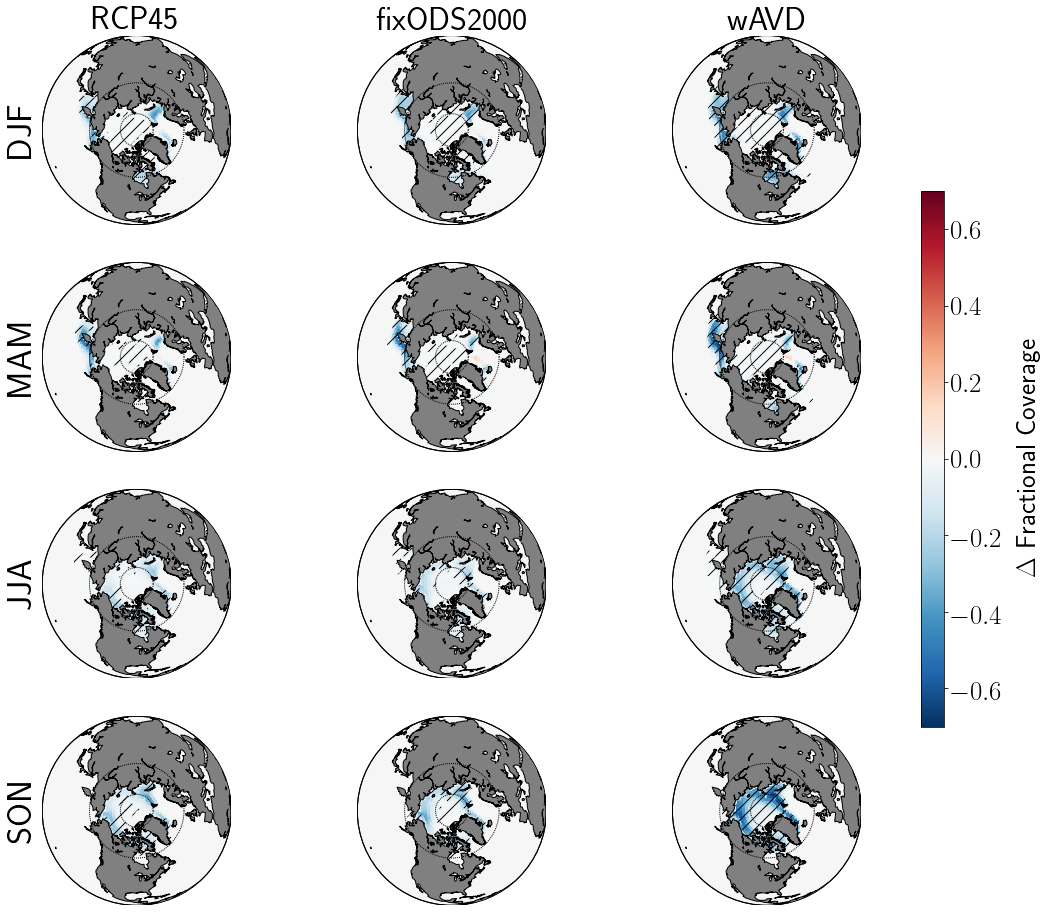

In [53]:
fig = plt.figure(figsize=(16,16))

plt.subplot(4,3,1)
mm.drawcoastlines()
mm.drawmapboundary(fill_color='none')
mm.fillcontinents(color = 'grey')
pc1 = mm.pcolormesh(x,y,RCP45_DD_DJF_Avg_new, cmap='RdBu_r')
plt.clim(-0.7,0.7)
pc2 = mm.contourf(x,y, RCP45_DJF_Pval, colors = 'none', hatches=['//'])
plt.title("RCP45")
plt.ylabel("DJF",fontsize=35)
parallels = [60]
mm.drawparallels(parallels)

plt.subplot(4,3,2)
mm.drawcoastlines()
mm.drawmapboundary(fill_color='none')
mm.fillcontinents(color = 'grey')
pc1 = mm.pcolormesh(x,y,fixODS2000_DD_DJF_Avg_new , cmap='RdBu_r')
plt.clim(-0.7,0.7)
pc2 = mm.contourf(x,y, fixODS2000_DJF_Pval, colors = 'none', hatches=['//'])
plt.title("fixODS2000")
parallels = [60]
mm.drawparallels(parallels)

plt.subplot(4,3,3)
mm.drawcoastlines()
mm.drawmapboundary(fill_color='none')
mm.fillcontinents(color = 'grey')
pc1 = mm.pcolormesh(x,y,wAVD_DD_DJF_Avg_new , cmap='RdBu_r')
plt.clim(-0.7,0.7)
pc2 = mm.contourf(x,y, wAVD_DJF_Pval, colors = 'none', hatches=['//'])
plt.title("wAVD")
parallels = [60]
mm.drawparallels(parallels)

plt.subplot(4,3,4)
mm.drawcoastlines()
mm.drawmapboundary(fill_color='none')
mm.fillcontinents(color = 'grey')
pc1 = mm.pcolormesh(x,y,RCP45_DD_MAM_Avg_new , cmap='RdBu_r')
plt.clim(-0.7,0.7)
pc2 = mm.contourf(x,y, RCP45_MAM_Pval, colors = 'none', hatches=['//'])
plt.ylabel("MAM",fontsize=35)
parallels = [60]
mm.drawparallels(parallels)

plt.subplot(4,3,5)
mm.drawcoastlines()
mm.drawmapboundary(fill_color='none')
mm.fillcontinents(color = 'grey')
pc1 = mm.pcolormesh(x,y,fixODS2000_DD_MAM_Avg_new , cmap='RdBu_r')
plt.clim(-0.7,0.7)
pc2 = mm.contourf(x,y, fixODS2000_MAM_Pval, colors = 'none', hatches=['//'])
parallels = [60]
mm.drawparallels(parallels)

plt.subplot(4,3,6)
mm.drawcoastlines()
mm.drawmapboundary(fill_color='none')
mm.fillcontinents(color = 'grey')
pc1 = mm.pcolormesh(x,y,wAVD_DD_MAM_Avg_new , cmap='RdBu_r')
plt.clim(-0.7,0.7)
pc2 = mm.contourf(x,y, wAVD_MAM_Pval, colors = 'none', hatches=['//'])
parallels = [60]
mm.drawparallels(parallels)

plt.subplot(4,3,7)
mm.drawcoastlines()
mm.drawmapboundary(fill_color='none')
mm.fillcontinents(color = 'grey')
pc1 = mm.pcolormesh(x,y,RCP45_DD_JJA_Avg_new, cmap='RdBu_r')
plt.clim(-0.7,0.7)
pc2 = mm.contourf(x,y, RCP45_JJA_Pval, colors = 'none', hatches=['//'])
plt.ylabel("JJA",fontsize=35)
parallels = [60]
mm.drawparallels(parallels)

plt.subplot(4,3,8)
mm.drawcoastlines()
mm.drawmapboundary(fill_color='none')
mm.fillcontinents(color = 'grey')
pc1 = mm.pcolormesh(x,y,fixODS2000_DD_JJA_Avg_new , cmap='RdBu_r')
plt.clim(-0.7,0.7)
pc2 = mm.contourf(x,y, fixODS2000_JJA_Pval, colors = 'none', hatches=['//'])
parallels = [60]
mm.drawparallels(parallels)

plt.subplot(4,3,9)
mm.drawcoastlines()
mm.drawmapboundary(fill_color='none')
mm.fillcontinents(color = 'grey')
pc1 = mm.pcolormesh(x,y,wAVD_DD_JJA_Avg_new, cmap='RdBu_r')
plt.clim(-0.7,0.7)
pc2 = mm.contourf(x,y, wAVD_JJA_Pval, colors = 'none', hatches=['//'])
parallels = [60]
mm.drawparallels(parallels)

plt.subplot(4,3,10)
mm.drawcoastlines()
mm.drawmapboundary(fill_color='none')
mm.fillcontinents(color = 'grey')
pc1 = mm.pcolormesh(x,y,RCP45_DD_SON_Avg_new, cmap='RdBu_r')
plt.clim(-0.7,0.7)
pc2 = mm.contourf(x,y, RCP45_SON_Pval, colors = 'none', hatches=['//'])
plt.ylabel("SON",fontsize=35)
parallels = [60]
mm.drawparallels(parallels)

plt.subplot(4,3,11)
mm.drawcoastlines()
mm.drawmapboundary(fill_color='none')
mm.fillcontinents(color = 'grey')
pc1 = mm.pcolormesh(x,y,fixODS2000_DD_SON_Avg_new, cmap='RdBu_r')
plt.clim(-0.7,0.7)
pc2 = mm.contourf(x,y, fixODS2000_SON_Pval, colors = 'none', hatches=['//'])
parallels = [60]
mm.drawparallels(parallels)

plt.subplot(4,3,12)
mm.drawcoastlines()
mm.drawmapboundary(fill_color='none')
mm.fillcontinents(color = 'grey')
pc1 = mm.pcolormesh(x,y,wAVD_DD_SON_Avg_new, cmap='RdBu_r')
plt.clim(-0.7,0.7)
pc2 = mm.contourf(x,y, wAVD_SON_Pval, colors = 'none', hatches=['//'],extend='both')
parallels = [60]
mm.drawparallels(parallels)

#add colorbar
cbar_ax2 = fig.add_axes([0.92, 0.28, 0.02, 0.465])
sm = plt.cm.ScalarMappable(cmap = 'RdBu_r',norm=plt.Normalize(vmin=-0.7, vmax=0.7))
sm.set_array([])
cbar = fig.colorbar(sm,cbar_ax2)
cbar.set_label('$\Delta$ Fractional Coverage', fontsize=27, labelpad=12)
cbar.ax.tick_params(labelsize=27)

plt.savefig('Ensemble Seasonal Difference in Decade Average Sea Ice Fractional Coverage.png', bbox_inches='tight')